<a href="https://colab.research.google.com/github/Dil8ert/AQI_prediction/blob/main/AQI_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,date_delta
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,0.0
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1.0
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2.0
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,3.0
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2004.0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2005.0
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2006.0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2007.0


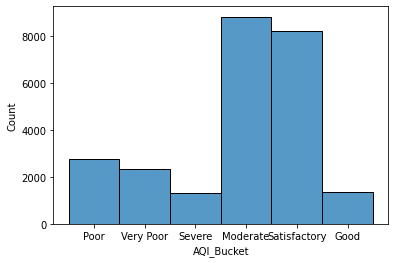

In [ ]:
df.value_counts(df['AQI_Bucket'])
sns.histplot(data=df['AQI_Bucket'])

In [ ]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))

In [ ]:
df1.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,date_delta
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,64.510857,109.659366,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,1.788420,158.781552,1229.236294
std,59.807551,72.324020,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,4.062039,130.272413,548.624475
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,0.980000,88.000000,836.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,1312.000000
75%,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,0.980000,179.000000,1706.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2008.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  date_delta  29531 non-

In [ ]:
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [ ]:
df = df1

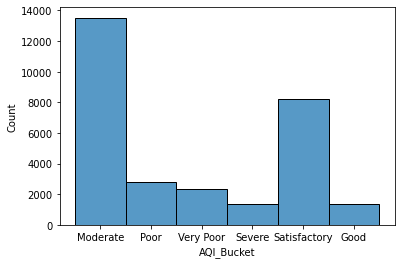

In [ ]:
df
sns.histplot(data=df['AQI_Bucket'])

In [ ]:
df['vehical pollution'] = 0
for i in df.columns[2:11]:
    df['vehical pollution'] += df[i]
df['industrial pollution'] = 0
for i in df.columns[11:15]:
    df['industrial pollution'] += df[i]
df['total'] = df['industrial pollution'] + df['vehical pollution']
df['total'].max()

3176.3100000000004

In [ ]:
df['total'].min()

43.989999999999995

In [ ]:
df.loc[np.where(df['total'] == 3176.3100000000004 )[0]]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,vehical pollution,industrial pollution,total
1145,Ahmedabad,2018-02-19,242.66,95.68,132.47,199.17,246.03,15.85,132.47,9.16,44.06,0.74,5.81,3.21,2049.0,Severe,1117.55,2058.76,3176.31


In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Moderate')]['total'].min()

139.59

In [ ]:
df['AQI_Bucket'].value_counts()

Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: AQI_Bucket, dtype: int64

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Moderate')]['total'].max()

2444.7800000000007

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Satisfactory')]['total'].max()

1148.96

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Satisfactory')]['total'].min()

104.89999999999999

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Poor')]['total'].max()

1376.01

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Poor')]['total'].min()

373.14

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Severe')]['total'].max()

3176.3100000000004

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Severe')]['total'].min()

640.2800000000001

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Very Poor')]['total'].max()

1751.73

In [ ]:
df.loc[np.where(df['AQI_Bucket'] == 'Very Poor')]['total'].min()

493.27

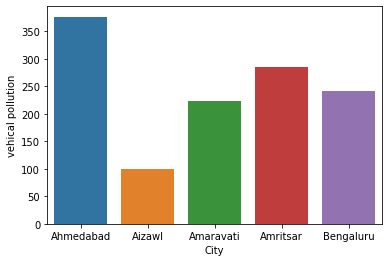

In [ ]:
vehical_poll_city=df[['City','vehical pollution']].groupby(['City'],as_index=False).mean()
sns.barplot(x='City',y='vehical pollution',data=vehical_poll_city.head(5))

Vehicle pollution in each city

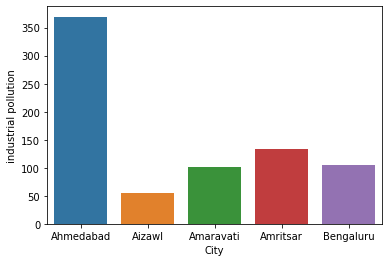

In [ ]:
industrial_poll_city=df[['City','industrial pollution']].groupby(['City'],as_index=False).mean()
sns.barplot(x='City',y='industrial pollution',data=industrial_poll_city.head(5))

Industrial pollution in each city


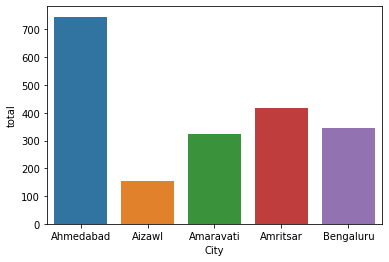

In [ ]:
total_poll_city = df[['City','total']].groupby(['City'],as_index=False).mean()
sns.barplot(x='City',y='total',data=total_poll_city.head(5))

Total emissions in each city

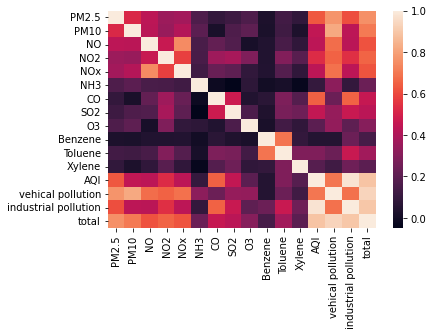

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,vehical pollution,industrial pollution,total
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,358.31,118.02,476.33
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,252.80,130.95,383.75
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate,303.67,143.45,447.12
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate,254.62,133.57,388.19
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate,342.12,146.68,488.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,163.03,56.04,219.07
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,199.85,73.33,273.18
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,190.52,68.02,258.54
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,167.41,54.00,221.41


In [ ]:
from sklearn.model_selection import train_test_split
df2 = df.copy()
df2.drop('Date',axis=1,inplace=True)
X =  df2[df2.columns[:15]]
y = df2[['AQI_Bucket']]
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'].astype(str))
df['AQI_Bucket']=le.fit_transform(df['AQI_Bucket'].astype(str))

In [ ]:
from sklearn.model_selection import train_test_split
df2 = df.copy()
df2.drop('Date',axis=1,inplace=True)
X =  df2[df2.columns[:15]]
y = df2[['AQI_Bucket']]
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)

Linear Regression 30% test split ->
MSE : 1.5155513476622153e-29

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(X_train_30, y_train_30)
y_pred = model.predict(X_test_30)
mean_squared_error(y_test_30, y_pred)

9.151011227176821e-30

Linear Regression 40% test split ->
MSE : 2.1292833685397445e-29

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(X_train_40, y_train_40)
y_pred = model.predict(X_test_40)
mean_squared_error(y_test_40, y_pred)

3.4631520744876935e-30

SVC 30% accuracy = 98.7020316027088

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cls=SVC()
cls.fit(X_train_30,y_train_30)
svmpred=cls.predict(X_test_30)
svmpred
cm=confusion_matrix(y_test_30,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test_30,svmpred)
print("accuracy",accuracy*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confussion matrix
[[ 354    0    0   31    0    0]
 [   0 4090    0    4    0    0]
 [   0   21  792    0    0   16]
 [   0   19    0 2422    0    0]
 [   0    0    0    0  389   17]
 [   0    0    4    0    3  698]]


accuracy 98.7020316027088


SVC 40% accuracy 98.5439769745196

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls=SVC()
cls.fit(X_train_40,y_train_40)
svmpred=cls.predict(X_test_40)
svmpred
cm=confusion_matrix(y_test_40,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test_40,svmpred)
print("accuracy",accuracy*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confussion matrix
[[ 478    0    0   54    0    0]
 [   0 5438    2    8    0    0]
 [   0   32 1073    0    0   20]
 [   0   23    0 3214    0    0]
 [   0    0    0    0  515   21]
 [   0    0    5    0    7  923]]


accuracy 98.5439769745196


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train_30, y_train_30)
rf_predict=rf.predict(X_test_30)

rf_conf_matrix = confusion_matrix(y_test_30, rf_predict)
rf_acc_score = accuracy_score(y_test_30, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


confussion matrix
[[ 385    0    0    0    0    0]
 [   0 4094    0    0    0    0]
 [   0    0  829    0    0    0]
 [   0    0    0 2441    0    0]
 [   0    0    0    0  406    0]
 [   0    0    0    0    0  705]]


accuracy 100.0


Random Forest Classifier 40%: accuracy 99.98306949970372

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train_40, y_train_40)
rf_predict=rf.predict(X_test_40)
rf_predict1=rf.predict(X_train_40)
# rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test_40, rf_predict)
# print("confussion matrix")
# print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.




accuracy 99.98306949970372
